# Transform CH4 and N2O emissions to CO2eq

From: https://ghgprotocol.org/sites/default/files/Global-Warming-Potential-Values%20(Feb%2016%202016)_1.pdf

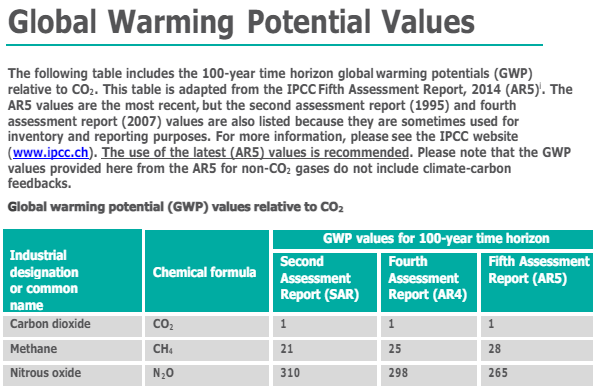

To convert CH4 and N2O emissions to CO2eq, we need to multiply the emissions for each gas Global Warming Potential (GWP) value.

**GWP CH4 = 28**

**GWP N2O = 265**

In [1]:
import pandas as pd
import numpy as np

In [2]:
emissions_df = pd.read_parquet(r'../data/FAOSTAT/clean_data/all_tables_processed/tablas_emisiones/merged_food_emissions_v1.parquet')

In [3]:
#Fill missing values with 0
emissions_df.fillna(0, inplace=True)

In [4]:
emissions_df.sample(5)

,Area Code,Area,Year,Item Code,Item,Burning_crop_residues_(Emissions_CH4)_(kt),Burning_crop_residues_(Emissions_N2O)_(kt),Crop_residues_(Emissions_N2O)_(kt),Crops_total_(Emissions_CH4)_(kt),Crops_total_(Emissions_N2O)_(kt),...,Synthetic_fertilizers_(Emissions_N2O)_(kt),Emissions_(N2O)_(Manure_applied)_(kt),Enteric_fermentation_(Emissions_CH4)_(kt),Livestock_total_(Emissions_CH4)_(kt),Livestock_total_(Emissions_N2O)_(kt),Manure_left_on_pasture_(Emissions_N2O)_(kt),Manure_management_(Emissions_CH4)_(kt),Manure_management_(Emissions_N2O)_(kt),Stocks_(An),crops_or_livestock
30765,38,Sri Lanka,1995,1048,Swine,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0869,0.6083,0.0121,0.0,0.5214,0.0058,86900.0,livestock
76656,99,Iceland,1996,1048,Swine,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.1081,0.3790,0.0116,0.0,0.2709,0.0039,72057.0,livestock
75327,97,Hungary,2013,56,Maize (corn),3.3550,0.0870,1.0700,3.3550,1.1570,...,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,crops
251404,5849,Non-Annex I countries,2021,27,Rice,240.6595,6.2393,173.2722,23795.7195,179.5115,...,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,crops
231687,5403,Southern Europe,1981,79,Millet,0.0000,0.0000,0.0011,0.0000,0.0011,...,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,crops


## Function to transform emissions

In [27]:
def create_CO2eq_columns(df):
    # Define the conversion factors
    conversion_factors = {
        'N2O': 265,
        'CH4': 28
    }
    
    # Loop through the columns in the dataframe
    for column in df.columns:
        if 'N2O' in column:
            # Create a new column name for CO2eq
            new_column = column.replace('N2O', 'N2O_CO2eq')
            # Multiply by the N2O conversion factor
            df[new_column] = df[column] * conversion_factors['N2O']
            df.drop(column, axis=1, inplace=True)
        
        elif 'Emissions_CH4' in column:
            # Create a new column name for CO2eq
            new_column = column.replace('Emissions_CH4', 'Emissions_CH4_CO2eq')
            # Multiply by the CH4 conversion factor
            df[new_column] = df[column] * conversion_factors['CH4']
            df.drop(column, axis=1, inplace=True)
    
    return df

In [28]:
emissions_df2 = create_CO2eq_columns(emissions_df)

In [29]:
emissions_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252987 entries, 0 to 252986
Data columns (total 21 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Area Code                                          252987 non-null  int64  
 1   Area                                               252987 non-null  object 
 2   Year                                               252987 non-null  int64  
 3   Item Code                                          252987 non-null  int64  
 4   Item                                               252987 non-null  object 
 5   Stocks_(An)                                        252987 non-null  float64
 6   crops_or_livestock                                 252987 non-null  object 
 7   Burning_crop_residues_(Emissions_CH4_CO2eq)_(kt)   252987 non-null  float64
 8   Burning_crop_residues_(Emissions_N2O_CO2eq)_(kt)   252987 non-null  float6

## Sum up all emissions to obtain PRODUCTION TOTAL EMISSIONS (CO2eq)

In [30]:
for column in emissions_df2.columns:
        if 'CO2eq' in column:
                print(column)

Burning_crop_residues_(Emissions_CH4_CO2eq)_(kt)
Burning_crop_residues_(Emissions_N2O_CO2eq)_(kt)
Crop_residues_(Emissions_N2O_CO2eq)_(kt)
Crops_total_(Emissions_CH4_CO2eq)_(kt)
Crops_total_(Emissions_N2O_CO2eq)_(kt)
Rice_cultivation_(Emissions_CH4_CO2eq)_(kt)
Synthetic_fertilizers_(Emissions_N2O_CO2eq)_(kt)
Emissions_(N2O_CO2eq)_(Manure_applied)_(kt)
Enteric_fermentation_(Emissions_CH4_CO2eq)_(kt)
Livestock_total_(Emissions_CH4_CO2eq)_(kt)
Livestock_total_(Emissions_N2O_CO2eq)_(kt)
Manure_left_on_pasture_(Emissions_N2O_CO2eq)_(kt)
Manure_management_(Emissions_CH4_CO2eq)_(kt)
Manure_management_(Emissions_N2O_CO2eq)_(kt)


In [31]:
total_columns = [
    ["Crops_total_(Emissions_CH4_CO2eq)_(kt)", "Crops_total_(Emissions_N2O_CO2eq)_(kt)"],
    ["Livestock_total_(Emissions_CH4_CO2eq)_(kt)", "Livestock_total_(Emissions_N2O_CO2eq)_(kt)"],
]

# Create TOTAL TOTAL column
emissions_df2["production_TOTAL_(emissions_CO2eq)_(kt)"] = 0

# Loop over column emissions and sum
for column in total_columns:
    emissions_df2["production_TOTAL_(emissions_CO2eq)_(kt)"] += emissions_df2[column].sum(axis=1)

In [32]:
emissions_df2.head()

,Area Code,Area,Year,Item Code,Item,Stocks_(An),crops_or_livestock,Burning_crop_residues_(Emissions_CH4_CO2eq)_(kt),Burning_crop_residues_(Emissions_N2O_CO2eq)_(kt),Crop_residues_(Emissions_N2O_CO2eq)_(kt),...,Rice_cultivation_(Emissions_CH4_CO2eq)_(kt),Synthetic_fertilizers_(Emissions_N2O_CO2eq)_(kt),Emissions_(N2O_CO2eq)_(Manure_applied)_(kt),Enteric_fermentation_(Emissions_CH4_CO2eq)_(kt),Livestock_total_(Emissions_CH4_CO2eq)_(kt),Livestock_total_(Emissions_N2O_CO2eq)_(kt),Manure_left_on_pasture_(Emissions_N2O_CO2eq)_(kt),Manure_management_(Emissions_CH4_CO2eq)_(kt),Manure_management_(Emissions_N2O_CO2eq)_(kt),production_TOTAL_(emissions_CO2eq)_(kt)
0,1,Armenia,1992,15,Wheat,0.0,crops,1.9796,0.4770,9.7520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.2086
1,1,Armenia,1992,44,Barley,0.0,crops,0.0000,0.0000,10.7590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.7590
2,1,Armenia,1992,56,Maize (corn),0.0,crops,0.0980,0.0265,0.1855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3100
3,1,Armenia,1992,71,Rye,0.0,crops,0.0000,0.0000,0.0795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0795
4,1,Armenia,1992,75,Oats,0.0,crops,0.0000,0.0000,0.1590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1590


In [36]:
#save a sample
emissions_df.query('Area == "World"').to_csv(r'..\data\FAOSTAT\clean_data\all_tables_processed\tablas_emisiones\merged_food_emissions_world.csv', index=False)

In [33]:
emissions_df.to_parquet(r'..\data\FAOSTAT\clean_data\all_tables_processed\tablas_emisiones\merged_food_emissions_v2.parquet', index=False)